In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

np.random.seed(42)

# Generate data
values = np.random.rand(100)
labels = []


In [4]:
# Assign class labels based on the value
for i in values[:50]:
    if i <= 0.5:
        labels.append('Class1')
    else:
        labels.append('Class2')

# Add None for unlabeled data
labels += [None] * 50

# Print the labels
print(labels)

['Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [5]:
# Create the DataFrame
data = {
    "Point": [f"x{i+1}" for i in range(100)],
    "Value": values,
    "Label": labels
}
df = pd.DataFrame(data)
df.head()

,Point,Value,Label
0,x1,0.374540,Class1
1,x2,0.950714,Class2
2,x3,0.731994,Class2
3,x4,0.598658,Class2
4,x5,0.156019,Class1


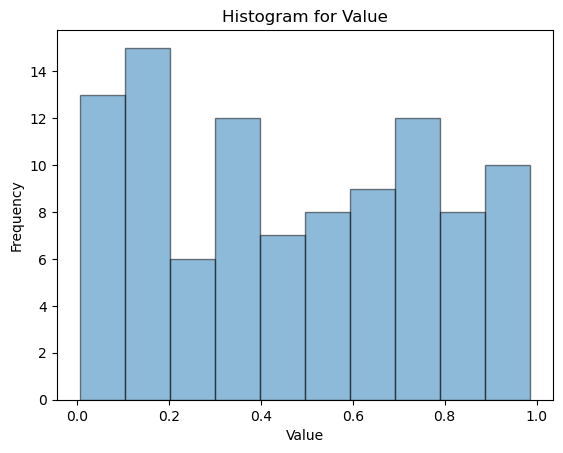

In [97]:
# Visualize the histogram for numeric columns
num_col = df.select_dtypes(include=['int', 'float']).columns
for col in num_col:
    df[col].hist(bins=10, alpha=0.5, edgecolor='black', grid=False)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [133]:
# Separate labeled and unlabeled data
labeled_df = df[df["Label"].notna()]
X_train = labeled_df["Value"].values.reshape(-1, 1)  # Reshaping to 2D for KNN
y_train = labeled_df["Label"]
unlabeled_df = df[df["Label"].isna()]
X_test = unlabeled_df["Value"].values.reshape(-1, 1)  # Reshaping to 2D for KNN

# Generate true labels for the unlabeled test set
true_labels = ["Class1" if x <= 0.5 else "Class2" for x in values[50:]]

Accuracy for k=1: 100.00%


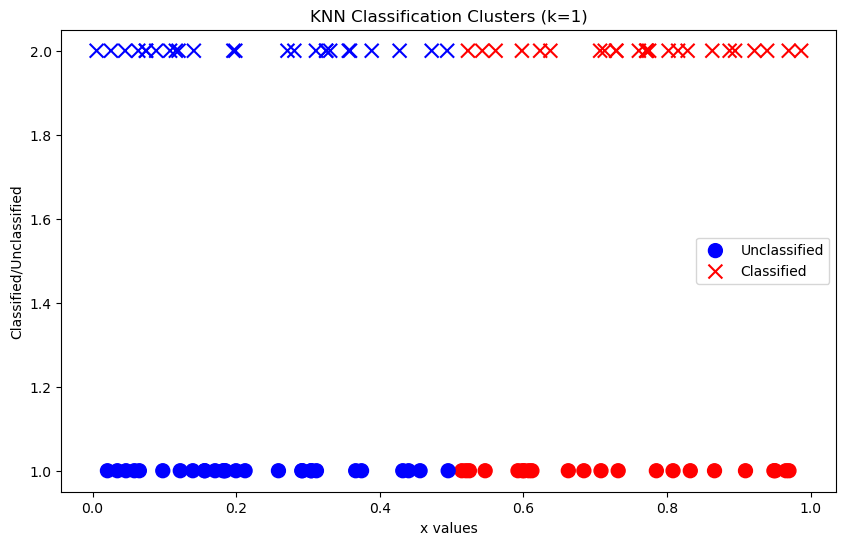

Accuracy for k=2: 100.00%


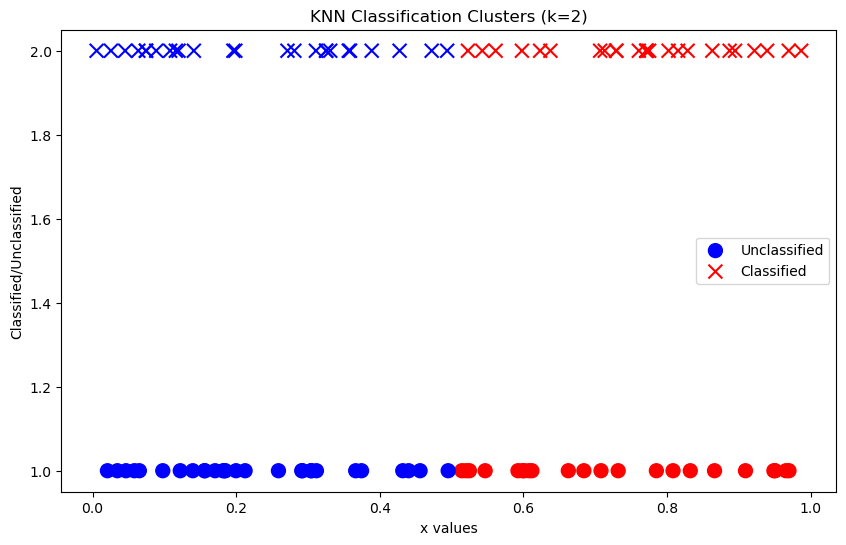

Accuracy for k=3: 98.00%


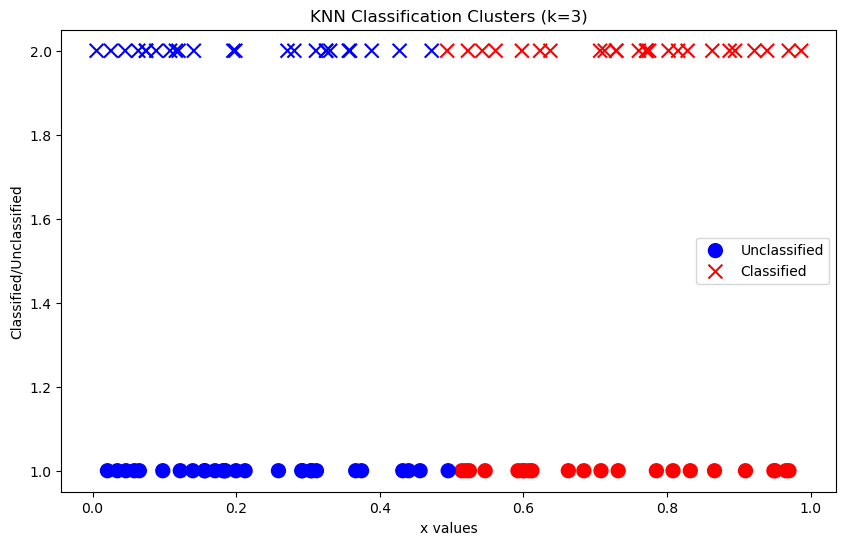

Accuracy for k=4: 98.00%


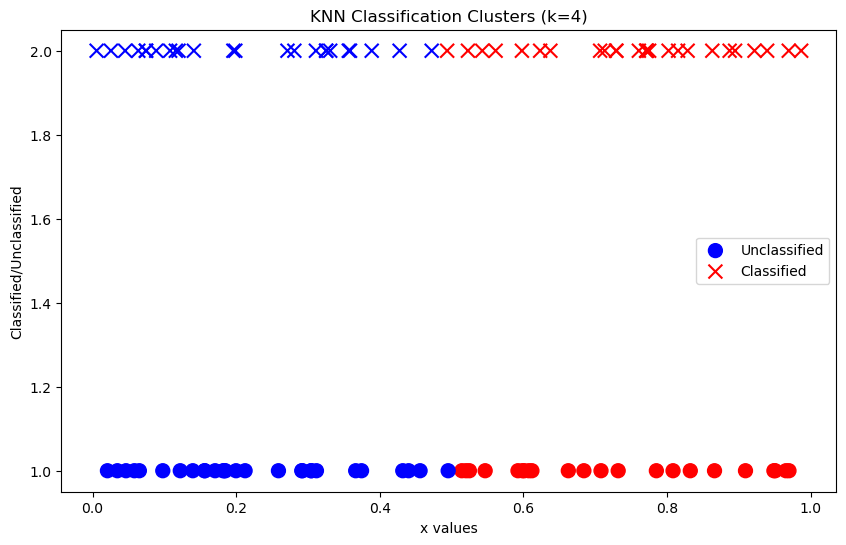

Accuracy for k=5: 98.00%


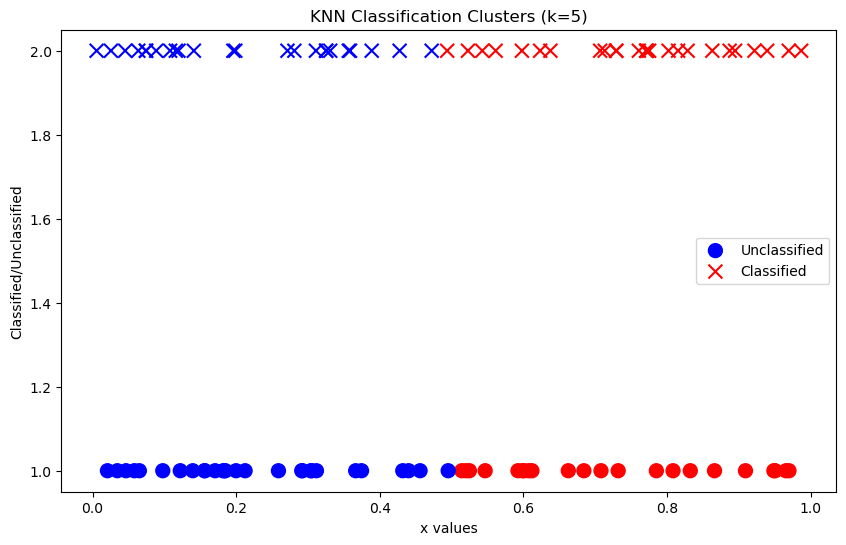

Accuracy for k=20: 98.00%


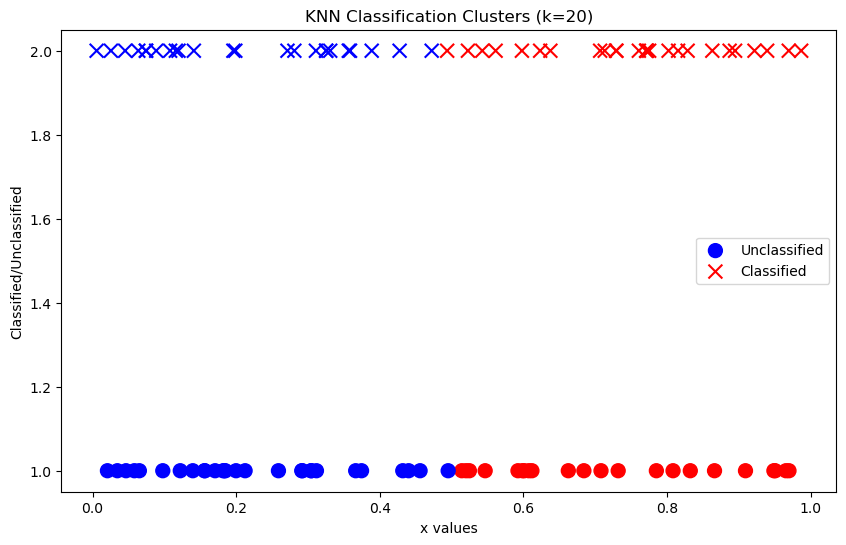

Accuracy for k=30: 100.00%


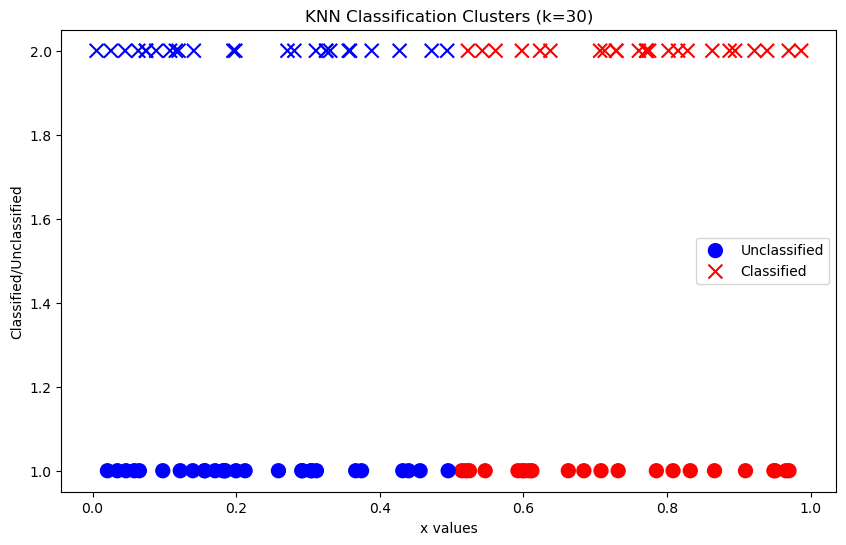

In [135]:
# Define k values for KNN
k_values = [1, 2, 3, 4, 5, 20, 30]
results = {}  # Corrected variable name
accuracies={}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test) 
    results[k] = predictions
# Calculate accuracy
    accuracy=accuracy_score (true_labels, predictions) * 100
    accuracies[k] = accuracy
    print (f"Accuracy for k={k}: {accuracy:.2f}%")
# Assign predictions back to the DataFrame for this k unlabeled_df[f"Label_k{k}"] = predictions
    unlabeled_df[f"Label_k{k}"]=predictions
    
    # Step 5: Visualization with clusters
    plt.figure(figsize=(10, 6))

    # Plot Labeled data (Unclassified data)
    plt.scatter(X_train, [1] * len(X_train), c=["blue" if lbl == "Class1" else "red" for lbl in y_train],
                label="Unclassified", marker="o", s=100)

    # Plot classified data (Classified data)
    plt.scatter(X_test, [2] * len(X_test), c=["blue" if lbl == "Class1" else "red" for lbl in predictions],
                label="Classified", marker="x", s=100)

    plt.xlabel("x values")
    plt.ylabel("Classified/Unclassified")
    plt.title(f"KNN Classification (k={k})")
    plt.legend()
    plt.show()


In [114]:
print(predictions)

['Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class1']


In [116]:
df1=unlabeled_df.drop(columns=['Label'],axis=1)
print(df1)

   Point     Value Label_k1 Label_k2 Label_k3 Label_k4 Label_k5 Label_k20  \
50   x51  0.969585   Class2   Class2   Class2   Class2   Class2    Class2   
51   x52  0.775133   Class2   Class2   Class2   Class2   Class2    Class2   
52   x53  0.939499   Class2   Class2   Class2   Class2   Class2    Class2   
53   x54  0.894827   Class2   Class2   Class2   Class2   Class2    Class2   
54   x55  0.597900   Class2   Class2   Class2   Class2   Class2    Class2   
55   x56  0.921874   Class2   Class2   Class2   Class2   Class2    Class2   
56   x57  0.088493   Class1   Class1   Class1   Class1   Class1    Class1   
57   x58  0.195983   Class1   Class1   Class1   Class1   Class1    Class1   
58   x59  0.045227   Class1   Class1   Class1   Class1   Class1    Class1   
59   x60  0.325330   Class1   Class1   Class1   Class1   Class1    Class1   
60   x61  0.388677   Class1   Class1   Class1   Class1   Class1    Class1   
61   x62  0.271349   Class1   Class1   Class1   Class1   Class1    Class1   

In [17]:
df=pd.DataFrame(data)
print(df.head())

  Point     Value   Label
0    x1  0.374540  Class1
1    x2  0.950714  Class2
2    x3  0.731994  Class2
3    x4  0.598658  Class2
4    x5  0.156019  Class1


In [19]:
df.nunique()

Point    100
Value    100
Label      2
dtype: int64

In [23]:
df.shape

(100, 3)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Point   100 non-null    object 
 1   Value   100 non-null    float64
 2   Label   50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,100.0,0.470181,0.297489,0.005522,0.193201,0.464142,0.730203,0.986887


In [29]:
df.isnull().sum()

Point     0
Value     0
Label    50
dtype: int64